In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## For colab:

In [2]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [3]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [4]:
# !nvidia-smi

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# os.chdir(r'/content/drive/MyDrive/higgs boson/')

## Display all rows:

In [7]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

## Loding Data:

In [8]:
# For colab:
# df1 = pd.read_csv('train_MICE_median_ind_QuantileTransformer.csv')
# df2 = pd.read_csv('train_MICE_med_ind_QT_dropOutlier.csv')

# For local
df1 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df2 = pd.read_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv')

In [9]:
X, y = df1.drop(columns=['Weight', 'Label']), df1['Weight']
X2, y2 = df2.drop(columns=['Weight', 'Label']), df2['Weight']

In [10]:
print(df1.shape, df2.shape, sep='\n')

(250000, 33)
(236794, 33)


## Train-test split:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30000)     # about 12%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=30000)   # about 12%

# Feature Selection:

## Using Correlation:

<AxesSubplot:>

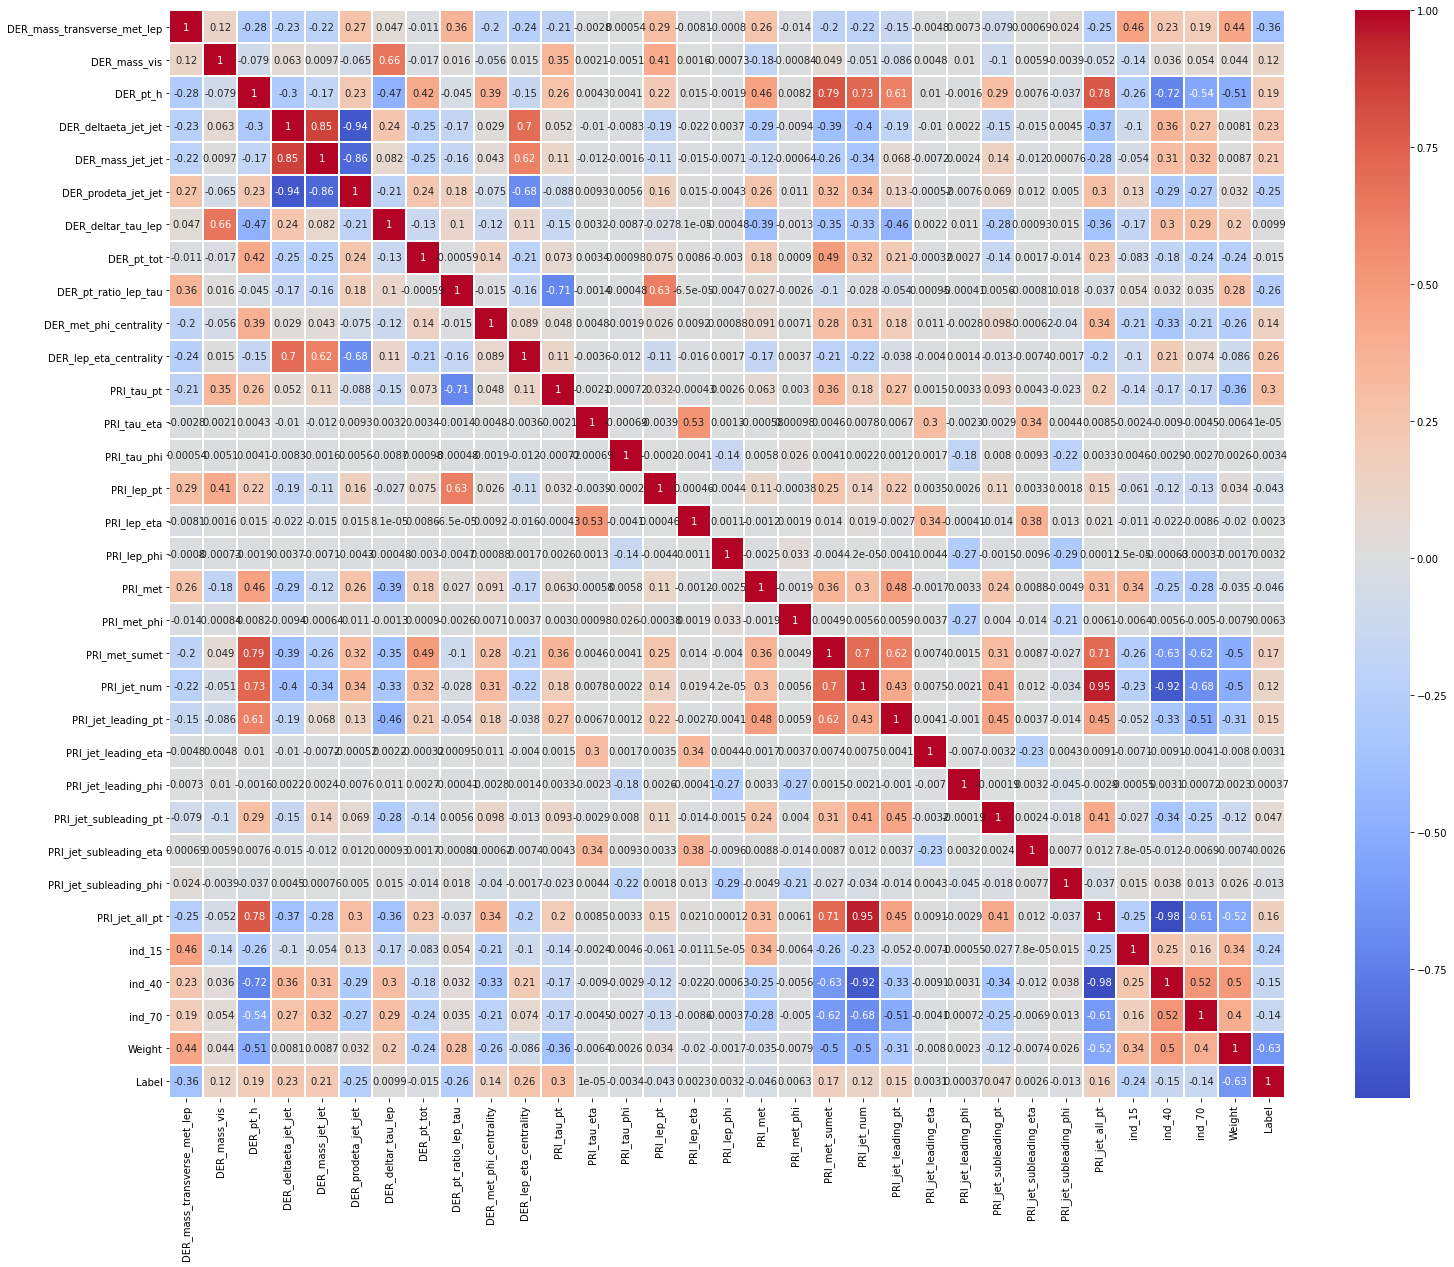

In [22]:
plt.figure(figsize=(25, 20))
sns.heatmap(df1.corr(), annot=True, linewidth=0.2, cmap='coolwarm')

In [35]:
df1.corr()['Weight'].abs().sort_values(ascending=False)

Weight                         1.000000
Label                          0.630982
PRI_jet_all_pt                 0.524384
DER_pt_h                       0.511098
ind_40                         0.502733
PRI_jet_num                    0.502531
PRI_met_sumet                  0.497281
DER_mass_transverse_met_lep    0.437293
ind_70                         0.395247
PRI_tau_pt                     0.358525
ind_15                         0.341103
PRI_jet_leading_pt             0.309266
DER_pt_ratio_lep_tau           0.278909
DER_met_phi_centrality         0.263811
DER_pt_tot                     0.243689
DER_deltar_tau_lep             0.202001
PRI_jet_subleading_pt          0.122124
DER_lep_eta_centrality         0.085647
DER_mass_vis                   0.044477
PRI_met                        0.034689
PRI_lep_pt                     0.033640
DER_prodeta_jet_jet            0.032131
PRI_jet_subleading_phi         0.025840
PRI_lep_eta                    0.020497
DER_mass_jet_jet               0.008715


## Univariate Selection:

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=25)
# fit = bestfeatures.fit(X,y)    # ValueError: Input X must be non-negative.

## ExtraTreeRegressor:

In [70]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100, max_depth=11, min_samples_split=50, n_jobs=-1)
model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=11, min_samples_split=50, n_jobs=-1)

In [71]:
model.score(X_test, y_test)   # Returns R2 value

0.6062214022449957

In [80]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
mean_squared_error(pred, y_test)

1.3757825078519323

In [72]:
etr_imp = model.feature_importances_

In [73]:
fi_etr = pd.Series(etr_imp, index=X.columns)
fi_etr.sort_values(ascending=False)

ind_40                         0.428413
DER_mass_transverse_met_lep    0.105479
DER_pt_ratio_lep_tau           0.063769
DER_prodeta_jet_jet            0.038746
ind_70                         0.036601
PRI_tau_pt                     0.035317
DER_mass_vis                   0.034140
ind_15                         0.033196
DER_lep_eta_centrality         0.033041
PRI_jet_subleading_pt          0.030574
DER_deltar_tau_lep             0.025647
PRI_met                        0.024415
DER_pt_tot                     0.018867
DER_deltaeta_jet_jet           0.018747
PRI_jet_leading_pt             0.017269
PRI_met_sumet                  0.015144
DER_pt_h                       0.010824
DER_mass_jet_jet               0.008673
PRI_jet_all_pt                 0.006279
DER_met_phi_centrality         0.006104
PRI_lep_pt                     0.004031
PRI_jet_num                    0.001431
PRI_jet_leading_eta            0.000617
PRI_lep_eta                    0.000559
PRI_jet_subleading_eta         0.000480


In [74]:
#Dropping the last 5 columns and checking:
drop_cols = ['PRI_jet_leading_phi',
 'PRI_jet_subleading_phi',
 'PRI_tau_phi',
 'PRI_met_phi',
 'PRI_lep_phi']

X_train_new = X_train.drop(columns=drop_cols)
X_test_new = X_test.drop(columns=drop_cols)

In [77]:
model_new = ExtraTreesRegressor(n_estimators=151, max_depth=11, min_samples_split=50, n_jobs=-1)
model_new.fit(X_train_new, y_train)

ExtraTreesRegressor(max_depth=11, min_samples_split=50, n_estimators=151,
                    n_jobs=-1)

In [78]:
model_new.score(X_test_new, y_test)   # Returns R2 value

0.6066593492860838

In [79]:
from sklearn.metrics import mean_squared_error
pred = model_new.predict(X_test_new)
mean_squared_error(pred, y_test)

1.3742524097665374